# Condiciones de la asignación principal

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

## Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

# Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
import re
import seaborn as sns

# Importar datos

In [3]:
df_contract=pd.read_csv('/datasets/final_provider/contract.csv')
df_personal=pd.read_csv('/datasets/final_provider/personal.csv')
df_internet=pd.read_csv('/datasets/final_provider/internet.csv')
df_phone=pd.read_csv('/datasets/final_provider/phone.csv')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Santiago\AppData\Local\Temp\ipykernel_10740\2835757929.py:1: SyntaxWarning: invalid escape sequence '\c'
  df_contract=pd.read_csv('final_provider\contract.csv')
C:\Users\Santiago\AppData\Local\Temp\ipykernel_10740\2835757929.py:2: SyntaxWarning: invalid escape sequence '\p'
  df_personal=pd.read_csv('final_provider\personal.csv')
C:\Users\Santiago\AppData\Local\Temp\ipykernel_10740\2835757929.py:3: SyntaxWarning: invalid escape sequence '\i'
  df_internet=pd.read_csv('final_provider\internet.csv')
C:\Users\Santiago\AppData\Local\Temp\ipykernel_10740\2835757929.py:4: SyntaxWarning: in

# Preprocesamiento

## Contratos

In [4]:
df_contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [5]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Podemos ver que los datos no tienen faltantes al tener completas las filas en cada columna, sin embargo, el tipo de objeto de la columna TotalCharges debería ser float.

In [6]:
#Funcion para pasar columnas al formato snake_case
def to_snake_case(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    s1 = s1.replace(' ','_')
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [7]:
#Pasamos las columnas al modo snake_case
columns=df_contract.columns
new_cols=[]
for i in columns:
    i=to_snake_case(i)
    new_cols.append(i)
df_contract.columns=new_cols
print(df_contract.columns)

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')


In [8]:
df_contract.describe()

,monthly_charges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


### Ausentes

In [9]:
df_contract.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64

In [10]:
df_contract['total_charges'].value_counts()

total_charges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

Evidenciamos que la columna total_charges tiene un valor ' ' que no significa nada por lo cual veremos que impacto tiene. 

In [11]:
df_contract[df_contract['total_charges']==' ']

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [12]:
100*df_contract[df_contract['total_charges']==' ']['total_charges'].count()/df_contract.shape[0]

0.15618344455487718

Estos datos representan solo el 0.1%, por lo tanto los eliminamos

In [13]:
df_contract['total_charges'].replace(' ',np.nan,inplace=True)

In [14]:
df_contract.dropna(inplace=True)

### Duplicados

In [15]:
df_contract.duplicated().sum()

0

In [16]:
#Pasamos la columna total charges a float
df_contract['total_charges']=df_contract['total_charges'].astype('float')

In [17]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   begin_date         7032 non-null   object 
 2   end_date           7032 non-null   object 
 3   type               7032 non-null   object 
 4   paperless_billing  7032 non-null   object 
 5   payment_method     7032 non-null   object 
 6   monthly_charges    7032 non-null   float64
 7   total_charges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 494.4+ KB


## Personal

In [18]:
df_personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [19]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [20]:
#Pasamos las columnas al modo snake_case
columns=df_personal.columns
new_cols=[]
for i in columns:
    i=to_snake_case(i)
    new_cols.append(i)
df_personal.columns=new_cols
print(df_personal.columns)

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')


El dataframe tiene datos basicos de cada cliente y con el metodo info se ve que está completo sin ausentes.

In [21]:
df_personal.describe()

,senior_citizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [22]:
df_personal['senior_citizen'].value_counts()

senior_citizen
0    5901
1    1142
Name: count, dtype: int64

### Ausentes

In [23]:
df_personal.isna().sum()

customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64

### Duplicados

In [24]:
df_personal.duplicated().sum()

0

Este dataset se ve bien sin ausentes ni duplicados.

## Internet

In [25]:
df_internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [26]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [27]:
#Pasamos las columnas al modo snake_case
columns=df_internet.columns
new_cols=[]
for i in columns:
    i=to_snake_case(i)
    new_cols.append(i)
df_internet.columns=new_cols
print(df_internet.columns)

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')


In [28]:
df_internet.describe()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


### Ausentes

In [29]:
df_internet.isna().sum()

customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64

### Duplicados

In [30]:
df_internet.duplicated().sum()

0

## Phone

In [31]:
df_phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [32]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [33]:
#Pasamos las columnas al modo snake_case
columns=df_phone.columns
new_cols=[]
for i in columns:
    i=to_snake_case(i)
    new_cols.append(i)
df_phone.columns=new_cols
print(df_phone.columns)

Index(['customer_id', 'multiple_lines'], dtype='object')


In [34]:
df_phone.describe()

,customer_id,multiple_lines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


### Ausentes

In [35]:
df_phone.isna().sum()

customer_id       0
multiple_lines    0
dtype: int64

### Duplicados

In [36]:
df_phone.duplicated().sum()

0

En conclusión de los 4 datasets, están sin ausentes o duplicados, y tienen información binaria acerca de a las características que el usuario tiene en el servicio de internet y telefonía, asi como las caracteristicas del contrato, medios de pago, envío de factura y caracteristicas de los clientes.

# Análisis exploratorio de datos (EDA)

## Analisis de contrato

In [37]:
df_contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


## ¿Que tipo de contrato es el que más escogen los clientes?

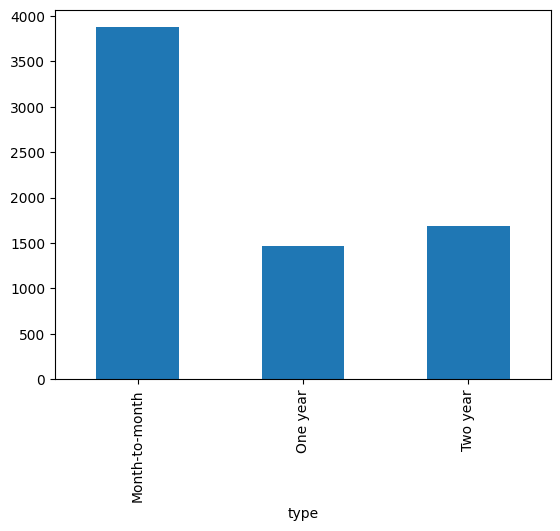

In [38]:
df_type=df_contract.groupby(['type'])['customer_id'].count()
df_type.plot(kind='bar')
plt.show()

En general podemos ver que más personas optan por el contrato mes a mes, seguido del contrato de dos años y el contrato de un año.

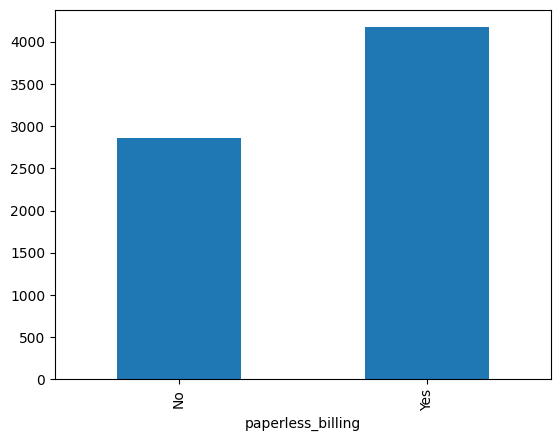

In [39]:
df_paperless=df_contract.groupby(['paperless_billing'])['customer_id'].count()
df_paperless.plot(kind='bar')
plt.show()

La mayoría de personas prefieren recibir su factura electrónica.

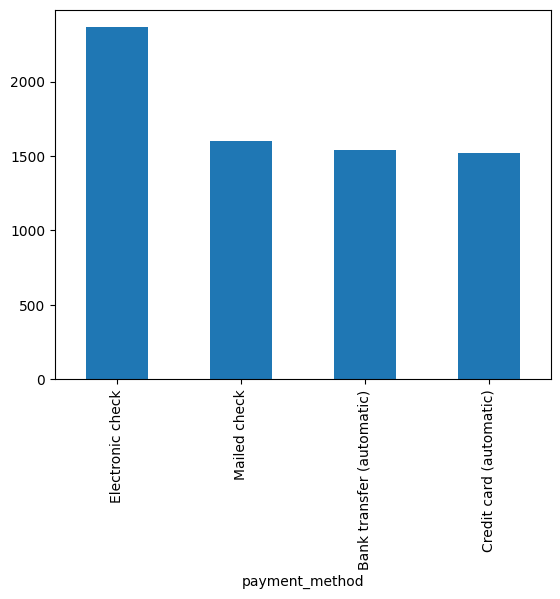

In [40]:
df_method=df_contract.groupby(['payment_method'])['customer_id'].count()
df_method=df_method.sort_values(ascending=False)
df_method.plot(kind='bar')
plt.show()

Los clientes prefieren el pago electronico, seguido por el cheque por correo, transferencia bancaria y tarjeta de crédito (autopago).

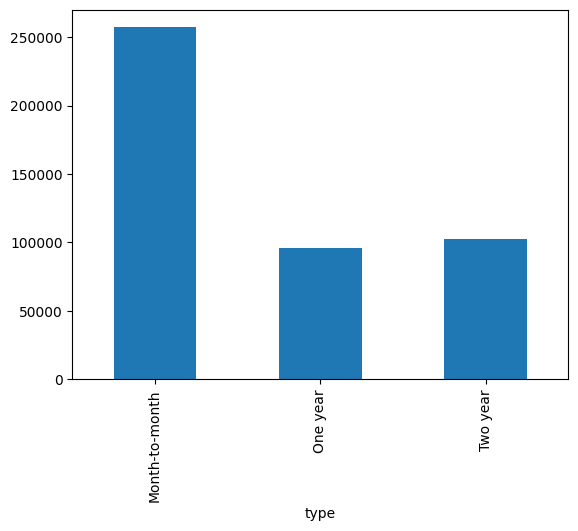

In [41]:
df_type=df_contract.groupby(['type'])['monthly_charges'].sum()
df_type.plot(kind='bar')
plt.show()

Podemos ver que los que más cargos tienen son los que tienen contrato més a més,seguido del que tiene contrato de dos años. y el que tiene contrato de un año.

## Análisis Personal

In [42]:
df_personal.head(10)

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


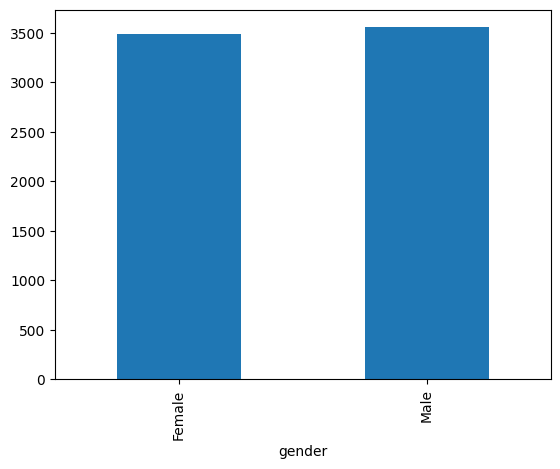

In [43]:
df_gender=df_personal.groupby(['gender'])['customer_id'].count()
df_gender.plot(kind='bar')
plt.show()

Los clientes están balanceados, más hombres que mujeres, sin embargo, casi la misma cantidad.

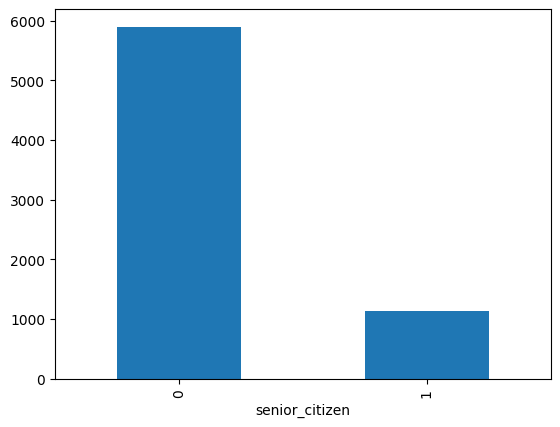

In [44]:
df_senior=df_personal.groupby(['senior_citizen'])['customer_id'].count()
df_senior.plot(kind='bar')
plt.show()

La mayoría de los clientes no son adultos mayores.

## Internet

In [45]:
df_internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


## ¿Cual es el servicio de internet más demandado?

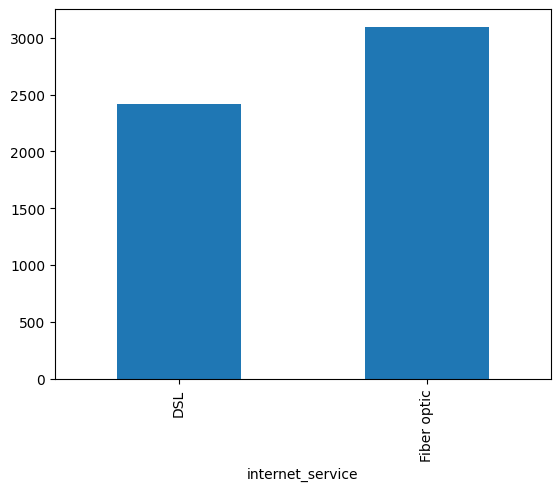

In [46]:
df_service=df_internet.groupby(['internet_service'])['customer_id'].count()
df_service.plot(kind='bar')
plt.show()

La mayoría de los clientes utiliza fibra obtica.

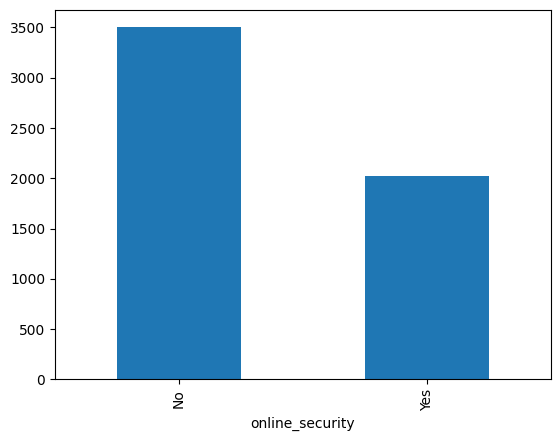

In [47]:
df_security=df_internet.groupby(['online_security'])['customer_id'].count()
df_security.plot(kind='bar')
plt.show()

La mayoría de clientes opta por no tener seguridad.

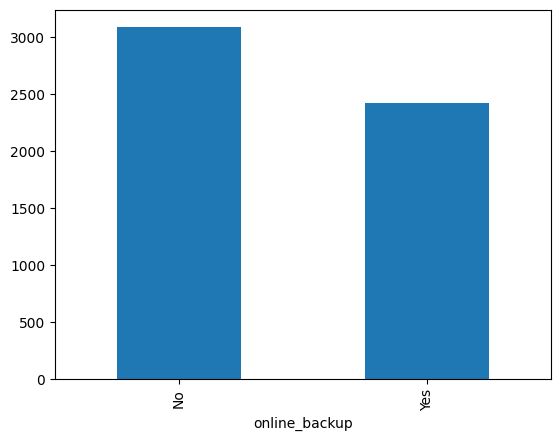

In [48]:
df_backup=df_internet.groupby(['online_backup'])['customer_id'].count()
df_backup.plot(kind='bar')
plt.show()

La mayoría de clientes prefiere no tener respaldo de información.

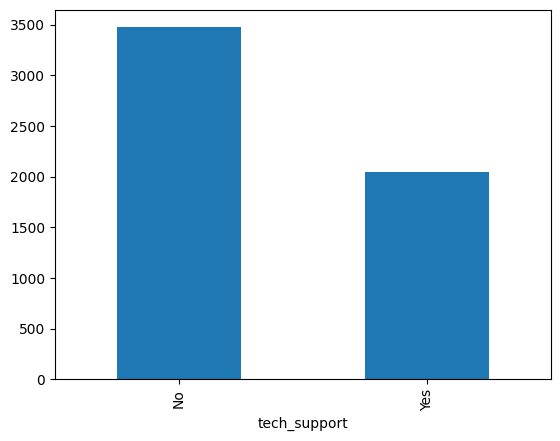

In [49]:
df_support=df_internet.groupby(['tech_support'])['customer_id'].count()
df_support.plot(kind='bar')
plt.show()

La mayoría de clientes prefiere no tener soporte técnico

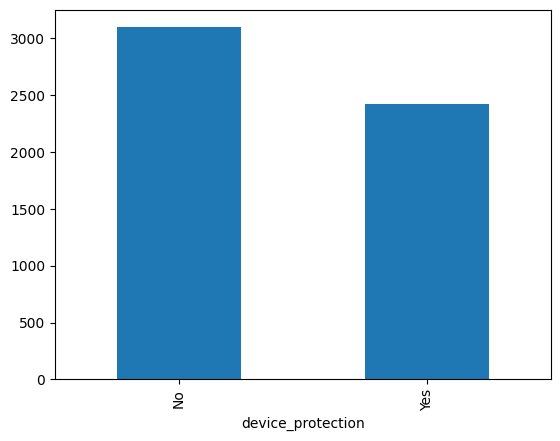

In [50]:
df_dev_prot=df_internet.groupby(['device_protection'])['customer_id'].count()
df_dev_prot.plot(kind='bar')
plt.show()

La mayoría de clientes prefiere no tener protección de su dispositivo.

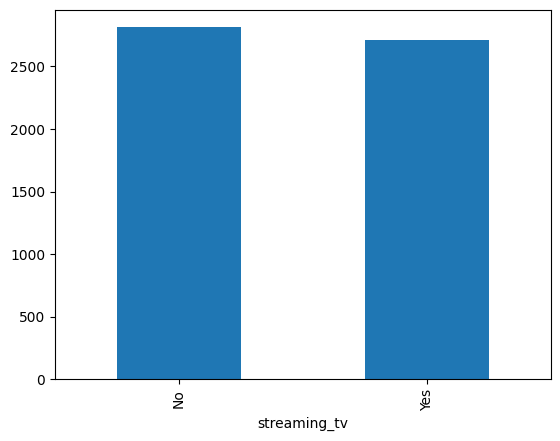

In [51]:
df_streaming_tv=df_internet.groupby(['streaming_tv'])['customer_id'].count()
df_streaming_tv.plot(kind='bar')
plt.show()

Aunque los clientes prefieren no tener televisión, los clientes que si lo prefieren se acercan a las que no, por lo cual está balanceado este servicio.

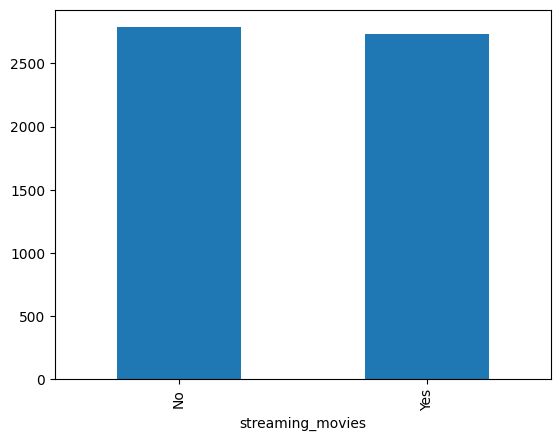

In [52]:
df_streaming_movies=df_internet.groupby(['streaming_movies'])['customer_id'].count()
df_streaming_movies.plot(kind='bar')
plt.show()

Aunque los clientes prefieren no tener peliculas, los clientes que si lo prefieren se acercan a las que no, por lo cual está balanceado este servicio.

## Phone

In [53]:
df_phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


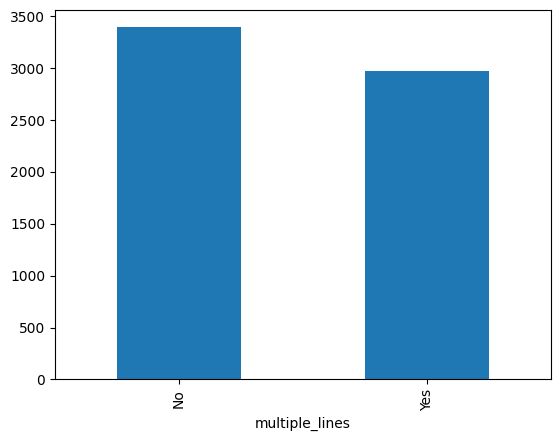

In [54]:
df_multiple=df_phone.groupby(['multiple_lines'])['customer_id'].count()
df_multiple.plot(kind='bar')
plt.show()

La mayoría de usuarios no tienen multimples lineas.

Con el fin de facilitar el análisis, juntaremos todos los datasets en uno solo.

In [55]:
data=df_personal.merge(df_contract.merge(df_internet.merge(df_phone,how='inner'),how='inner'),how='inner')

In [56]:
data.head(10)

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,No
1,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,No
2,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,No
3,9305-CDSKC,Female,0,No,No,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.50,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
4,1452-KIOVK,Male,0,No,Yes,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Fiber optic,No,Yes,No,No,Yes,No,Yes
5,7892-POOKP,Female,0,Yes,No,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
6,6388-TABGU,Male,0,No,Yes,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,DSL,Yes,Yes,No,No,No,No,No
7,9763-GRSKD,Male,0,Yes,Yes,2019-01-01,No,Month-to-month,Yes,Mailed check,49.95,587.45,DSL,Yes,No,No,No,No,No,No
8,8091-TTVAX,Male,0,Yes,No,2015-04-01,No,One year,No,Credit card (automatic),100.35,5681.10,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
9,0280-XJGEX,Male,0,No,No,2015-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes


## ¿Cuales son los medios de pago más utilizados?

<Axes: xlabel='customer_id', ylabel='payment_method'>

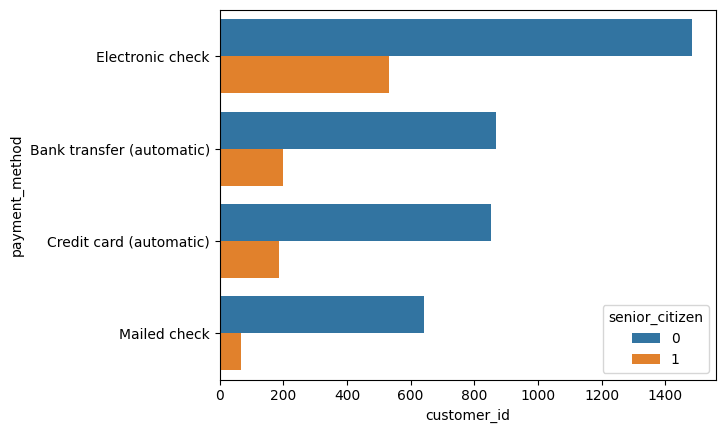

In [57]:
df_payment_method=data.groupby(['payment_method','senior_citizen'],as_index=False)['customer_id'].count()
df_payment_method.sort_values(by='customer_id',ascending=False,inplace=True)
sns.barplot(df_payment_method,y='payment_method',x='customer_id',hue='senior_citizen',orient='h')

Sin importar si los ususarios son adutos mayores o no, el medio de pago más usado es el cheque electronico, seguido por transferencia bancaria, tarjeta de crédito (autopago) y cheque por correo.

## ¿Que tipo de factura prefieren los usuarios?

<Axes: xlabel='customer_id', ylabel='paperless_billing'>

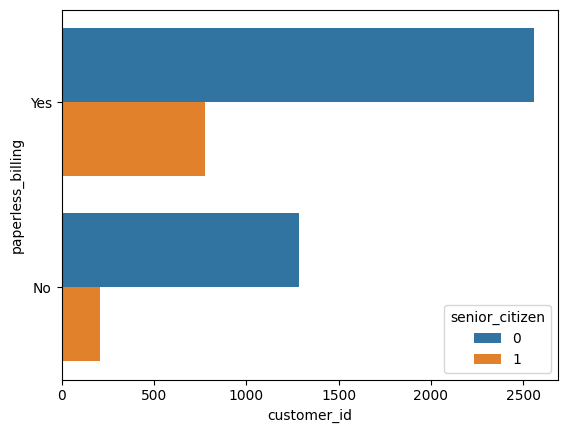

In [58]:
df_paperless_billing=data.groupby(['paperless_billing','senior_citizen'],as_index=False)['customer_id'].count()
df_paperless_billing.sort_values(by='customer_id',ascending=False,inplace=True)
sns.barplot(df_paperless_billing,y='paperless_billing',x='customer_id',hue='senior_citizen',orient='h')

Al igual que el medio de pago, la mayoría de los usuarios sin importar que sean adultos mayores prefieren no recibir su factura por correo.

## ¿Que tipo de contrato prefieren las personas que tienen personas a cargo?

<Axes: xlabel='total_charges', ylabel='type'>

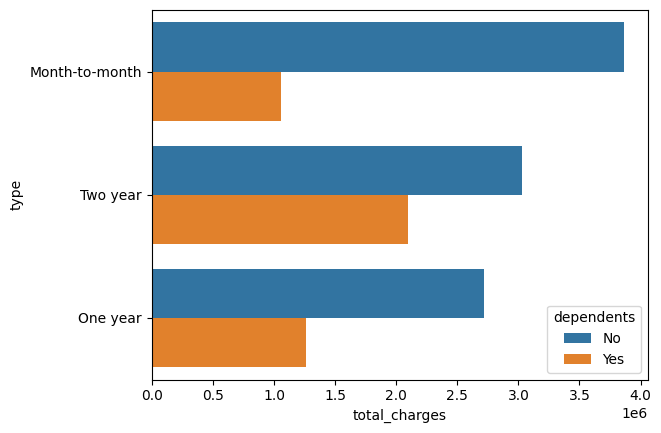

In [59]:
df_total_charges=data.groupby(['type','dependents'],as_index=False)['total_charges'].sum()
df_total_charges.sort_values(by='total_charges',ascending=False,inplace=True)
sns.barplot(df_total_charges,y='type',x='total_charges',hue='dependents',orient='h')

La mayoría de los clientes tienen más cargos y no tienen personas dependientes de ellos, además podemos ver que las personas que pagan mes a mes tienen más cargos

<Axes: xlabel='total_charges', ylabel='internet_service'>

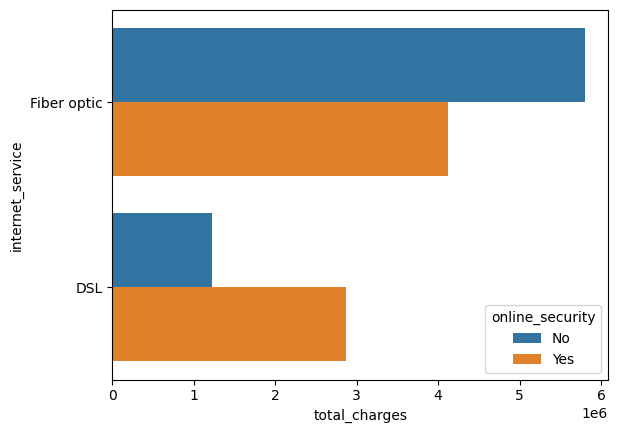

In [60]:
df_internet_service_1=data.groupby(['internet_service','online_security'],as_index=False)['total_charges'].sum()
df_internet_service_1.sort_values(by='total_charges',ascending=False,inplace=True)
sns.barplot(df_internet_service_1,y='internet_service',x='total_charges',hue='online_security',orient='h')

Podemos ver que los que tienen fibra obtica y no tiene seguridad online pagan más que los que si la tienen.

<Axes: xlabel='customer_id', ylabel='internet_service'>

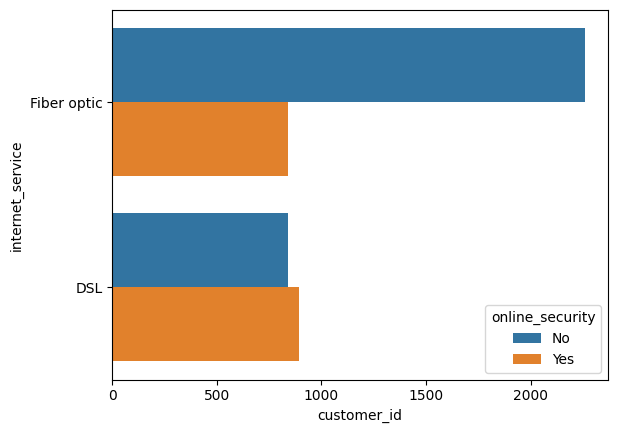

In [61]:
df_internet_service_1=data.groupby(['internet_service','online_security'],as_index=False)['customer_id'].count()
df_internet_service_1.sort_values(by='customer_id',ascending=False,inplace=True)
sns.barplot(df_internet_service_1,y='internet_service',x='customer_id',hue='online_security',orient='h')

Con este gráfico podemos confirmar que las personas que tienen el servicio DSL prefieren tener seguridad online que no tener. Por otro lado los que tienen fibra optica prefieren no tener seguridad online, y tienen más cargos que el servicio DSL.

In [79]:
def cancel(data):
    if data=='No':
        return '0'
    else:
        return '1'

In [88]:
#Creamos la columna cancel para etiquetar los datos
data['cancel']=data['end_date'].apply(cancel)
data.head(5)

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,...,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,cancel
0,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,...,1889.50,DSL,Yes,No,Yes,No,No,No,No,0
1,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,...,108.15,DSL,Yes,Yes,No,No,No,No,No,1
2,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,...,151.65,Fiber optic,No,No,No,No,No,No,No,1
3,9305-CDSKC,Female,0,No,No,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,...,820.50,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,1
4,1452-KIOVK,Male,0,No,Yes,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),...,1949.40,Fiber optic,No,Yes,No,No,Yes,No,Yes,0


In [86]:
data['end_date'].value_counts()

end_date
No                     3246
2019-11-01 00:00:00     414
2019-10-01 00:00:00     401
2019-12-01 00:00:00     392
2020-01-01 00:00:00     379
Name: count, dtype: int64

## ¿Cual es la tasa de cancelación y que caracteristicas tienen los usuarios que cancelan y los que no?

In [82]:
print('Tasa de cancelación: ',100*data[data['cancel']=='1']['customer_id'].count()/data.shape[0])

Tasa de cancelación:  32.8228476821192


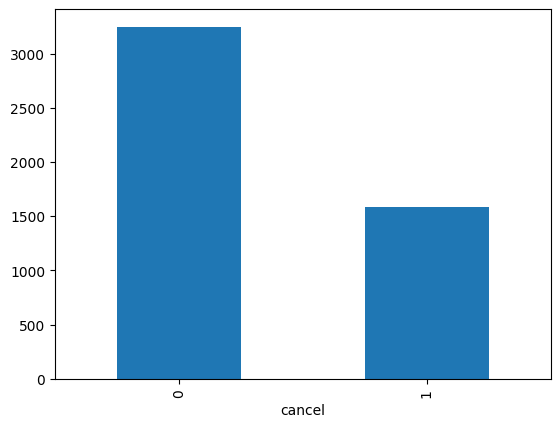

In [85]:
data_cancel_rate=data.groupby(['cancel'])['customer_id'].count()
data_cancel_rate.plot(kind='bar')
plt.show()

Podemos ver que la tasa de cancelación es del 32% lo cual es bastante alto teniendo en cuenta solo 4 meses, veremos más a fondo que tipo de caracteristicas tiene el plan de cada uno de los que cancelaron y los que no cancelaron.

<Axes: xlabel='customer_id', ylabel='internet_service'>

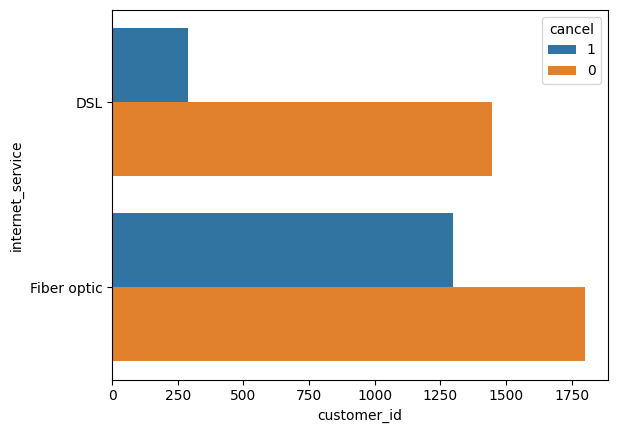

In [87]:
df_internet_service_2=data.groupby(['internet_service','cancel'],as_index=False)['customer_id'].count()
df_internet_service_2.sort_values(by='cancel',ascending=False,inplace=True)
sns.barplot(df_internet_service_2,y='internet_service',x='customer_id',hue='cancel',orient='h')

Los que cancelan y los que no cancelan siguen la misma tendencia a tener más fibra optica que DSL.

<Axes: xlabel='customer_id', ylabel='type'>

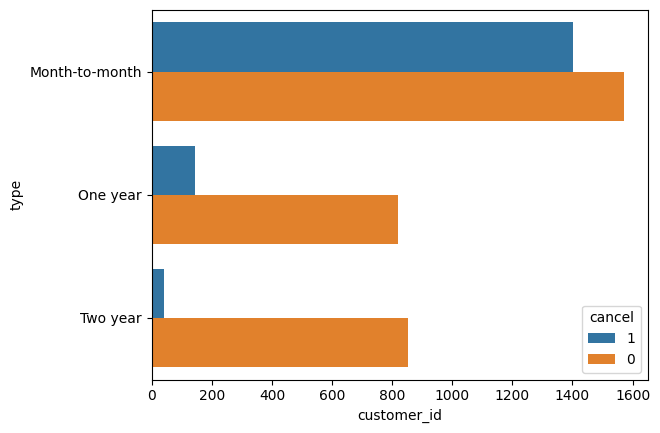

In [90]:
df_payment_type=data.groupby(['type','cancel'],as_index=False)['customer_id'].count()
df_payment_type.sort_values(by='cancel',ascending=False,inplace=True)
sns.barplot(df_payment_type,y='type',x='customer_id',hue='cancel',orient='h')

Aqui la diferencia se ve marcada, debido a que la mayoría de clientes que cancelan tienen el plan mes a mes, mientras que los que tienen planes anuales no suelen cancelar, sino que se mantienen.

<Axes: xlabel='total_charges', ylabel='type'>

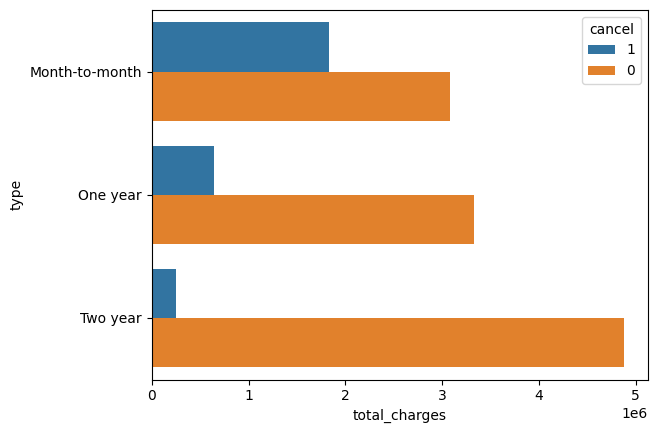

In [95]:
df_expenses=data.groupby(['type','cancel'],as_index=False)['total_charges'].sum()
df_expenses.sort_values(by='cancel',ascending=False,inplace=True)
sns.barplot(df_expenses,y='type',x='total_charges',hue='cancel',orient='h')

Podemos ver que los que cancelan gastan más en los planes mes a mes, lo que tiene complementa el anterior análisis.

In [96]:
data.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines', 'cancel'],
      dtype='object')

<Axes: xlabel='customer_id', ylabel='cancel'>

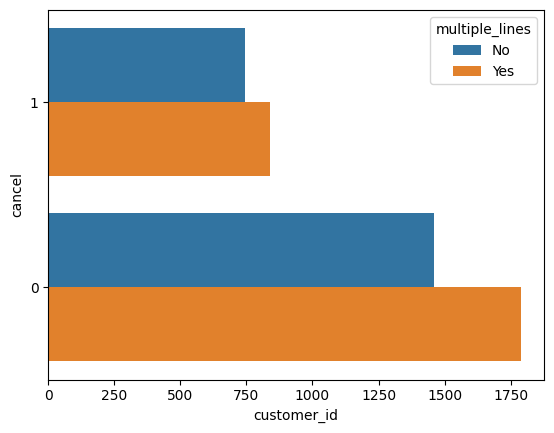

In [100]:
df_multiline=data.groupby(['cancel','multiple_lines'],as_index=False)['customer_id'].count()
df_multiline.sort_values(by='cancel',ascending=False,inplace=True)
sns.barplot(df_multiline,y='cancel',x='customer_id',hue='multiple_lines',orient='h')

Las personas que tienen multiples lineas suelen cancelar más que las que no lo tienen, por lo que puede ser un servicio desatendido.

<Axes: xlabel='customer_id', ylabel='payment_method'>

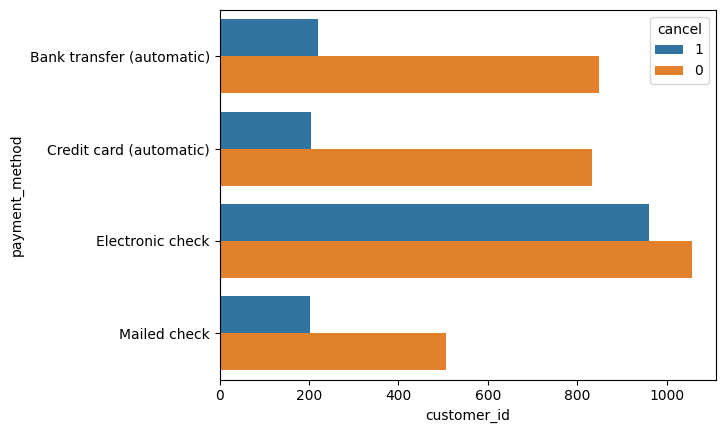

In [101]:
df_p_method=data.groupby(['payment_method','cancel'],as_index=False)['customer_id'].count()
df_p_method.sort_values(by='cancel',ascending=False,inplace=True)
sns.barplot(df_p_method,y='payment_method',x='customer_id',hue='cancel',orient='h')

In [ ]:
df_multiline=data.groupby(['cancel','multiple_lines'],as_index=False)['customer_id'].count()
df_multiline.sort_values(by='cancel',ascending=False,inplace=True)
sns.barplot(df_multiline,y='cancel',x='customer_id',hue='multiple_lines',orient='h')

La mayoría de clientes que cancelan, tienen el método de pago de cheque electrónico.

In [111]:
def pop_service(data,columns):
    list=[]
    for column in data[columns]:
        percentage=100*data[data[column]=='Yes']['customer_id'].count()/data.shape[0]
        list.append(percentage)
    pop_services={'Servicio':columns,'percentage':list}    
    df_pop_services=pd.DataFrame(pop_services)
    return df_pop_services


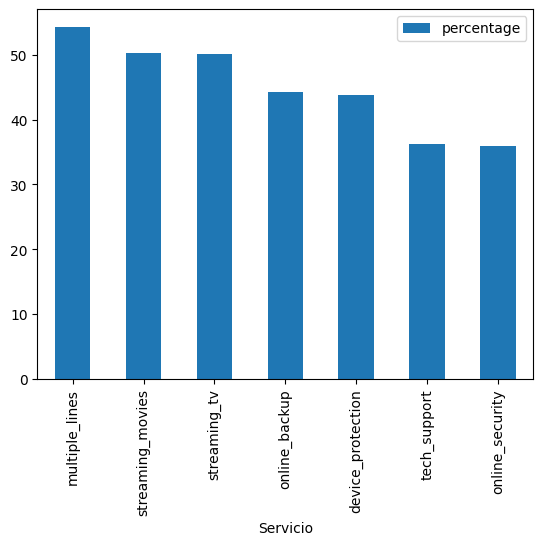

In [118]:
columns=['online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines']
df_pop_services=pop_service(data,columns)
df_pop_services.sort_values(by='percentage',ascending=False,inplace=True)
df_pop_services.plot(kind='bar',x='Servicio',y='percentage')
plt.show()

Podemos ver que el servicio más popular es el de las multiples líneas, seguido de las peliculas, televisión y respaldo online.

In [120]:
def pop_service_1(data,columns):
    list_0=[]
    list_1=[]
    for column in data[columns]:
        percentage_1=100*data[(data[column]=='Yes')&(data['cancel']=='1')]['customer_id'].count()/data.shape[0]
        percentage_0=100*data[(data[column]=='Yes')&(data['cancel']=='0')]['customer_id'].count()/data.shape[0]
        list_1.append(percentage_1)
        list_0.append(percentage_0)
    pop_services={'Servicio':columns,'percentage_0':list_0,'percentage_1':list_1}    
    df_pop_services=pd.DataFrame(pop_services)
    return df_pop_services

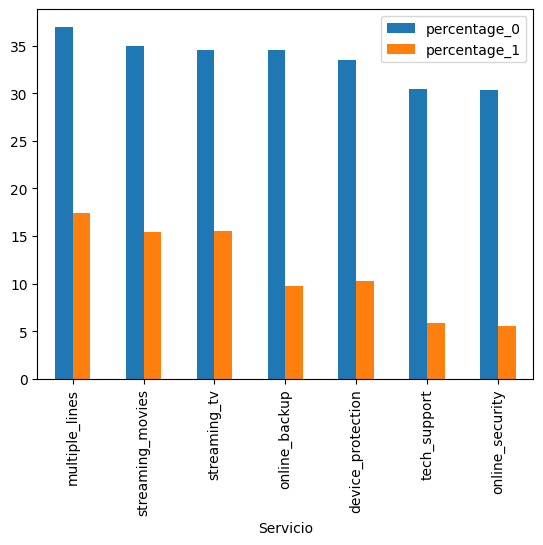

In [125]:
columns=['online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines']
df_pop_services_1=pop_service_1(data,columns)
df_pop_services_1.sort_values(by='percentage_0',ascending=False,inplace=True)
df_pop_services_1.plot(kind='bar',x='Servicio',y=['percentage_0','percentage_1'])
plt.show()

Las personas que cancelaron tienen como servicios más frecuentes la multininea, las peliculas, la televisión y la protección de los dispositivos

De la ultima pregunta, podemos concluir que la mayoría de usuarios que cancelan tienen el plan mes a mes, pagan con cheque electronico, tienen el servicio de internet de fibra optica y los servicios que más utilizan son la multilinea, las peliculas, la televisión y la protección de los dispositivos. La tasa de cancelación es del **32%**.

## Plan de trabajo

1. Segmentar los datos

2. Balanceo de datos

3. Separación de datos de entrenamiento, validación y testeo

4. Entrenamiento de modelo de clasificación

5. Testeo del modelo de clasificación



Primero debemos filtrar los datos por el tipo de contrato de más frecuente entre los que van a cancelar, en este caso el de 'mes a mes', posteriormente realizamos todo el proceso de entrenamiento del modelo de entrenamiento que nos permita clasificar a los clientes que puedan cancelar. 

Para realizar el algoritmo debemos balancear los datos, debido a que el 32% de los datos son clientes que cancelan, posteriormente entrenaremos y probaremos varios algoritmos de clasificación con potenciación del gradiente para obtener una exactitud y calidad del modelo alta. Posteriormente probaremos el mejor modelo con los datos de testeo para determinar la **tasa de cancelación**. 